In [1]:
# This is a python block

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

# Cargar data

- cargo

In [4]:
df_data = pd.read_csv('./dataset_clean.csv', index_col=[0])

# Preprocesamiento rápido

- Resuelvo problemas con descriptores que tienen infinitos

In [5]:
filter = df_data['Vacancy energy (log[eV/O atom])'] == -np.inf
df_data['Vacancy energy (log[eV/O atom])'][filter] = np.nan

/tmp/ipykernel_1159/1743523762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Vacancy energy (log[eV/O atom])'][filter] = np.nan


In [6]:
filter = df_data['Stability (log[eV/atom])'] == -np.inf
df_data['Stability (log[eV/atom])'][filter] = np.nan

/tmp/ipykernel_1159/1119673096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Stability (log[eV/atom])'][filter] = np.nan


- Imputo

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
df_data.isnull().sum()

Lowest distortion                     0
A                                     0
B                                     0
Radius A [ang]                        0
Radius B [ang]                        0
Formation energy [eV/atom]            0
Stability [eV/atom]                   0
Volume per atom [A^3/atom]            0
Band gap [eV]                         0
a [ang]                               0
Vacancy energy [eV/O atom]          349
Stability (log[eV/atom])            290
Vacancy energy (log[eV/O atom])    3169
Magnetic moment (^2[mu_B])          947
Valence B_1                           0
Valence B_2                           0
Valence B_3                           0
Valence B_4                           0
Valence B_5                           0
Valence B_element not in BV           0
Valence B_not balanced                0
dtype: int64

In [9]:
to_impute = ['Vacancy energy [eV/O atom]', 'Stability (log[eV/atom])', 'Vacancy energy (log[eV/O atom])', 'Magnetic moment (^2[mu_B])']

for row in to_impute:
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    imputer = imputer.fit(df_data[row].values.reshape(-1, 1))
    data_imputed = imputer.transform(df_data[row].values.reshape(-1, 1))

    df_data[row] = data_imputed


In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5263 entries, 0 to 5328
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lowest distortion                5263 non-null   int64  
 1   A                                5263 non-null   int64  
 2   B                                5263 non-null   int64  
 3   Radius A [ang]                   5263 non-null   float64
 4   Radius B [ang]                   5263 non-null   float64
 5   Formation energy [eV/atom]       5263 non-null   float64
 6   Stability [eV/atom]              5263 non-null   float64
 7   Volume per atom [A^3/atom]       5263 non-null   float64
 8   Band gap [eV]                    5263 non-null   float64
 9   a [ang]                          5263 non-null   float64
 10  Vacancy energy [eV/O atom]       5263 non-null   float64
 11  Stability (log[eV/atom])         5263 non-null   float64
 12  Vacancy energy (log[

# Split target y patrón

- Split

In [11]:
x = df_data.drop(['Lowest distortion', 'a [ang]'], axis=1)
y = df_data['a [ang]']

- Validación

In [12]:
print(x.shape)
print(y.shape)

(5263, 19)
(5263,)


# Split train y test

- Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle = True)

- Validación

In [14]:
print(X_train.shape)
print(X_test.shape)

(4210, 19)
(1053, 19)


# Escalamiento/Normalización de los datos 

- Instancio scaler para target y patron

In [15]:
x_st_scaler = StandardScaler() #Creo instancia del scaler
y_st_scaler = StandardScaler() #Creo instancia del scaler

- Escalo con fit sobre train, y trasnformo test

In [16]:
X_train = x_st_scaler.fit_transform(X_train) # escalo train
X_test = x_st_scaler.transform(X_test) #transformo test

In [17]:
y_train = y_st_scaler.fit_transform(y_train.values.reshape(-1,1)) # escalo train
y_test = y_st_scaler.transform(y_test.values.reshape(-1,1)) #transformo test

# Entrenamiento del modelo con Linear Regression

- Importo modelo de Sklearn

In [18]:
from sklearn.linear_model import LinearRegression

- Instancio modelo

In [19]:
model = LinearRegression()

- Entreno

In [20]:
model.fit(X_train, y_train)

LinearRegression()

- Predigo

In [21]:
y_pred = model.predict(X_test)

- Evaluación rápida

In [40]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

r2 = metrics.r2_score(y_test, y_pred)

In [41]:
print("mae: \t", mae.round(4))
print("mse: \t", mse.round(4))
print("rmse: \t", rmse.round(4))
print("r2: \t", r2.round(4))

mae: 	 0.4747
mse: 	 0.3535
rmse: 	 0.5945
r2: 	 0.6344


# Mejora del modelo y residuales

- Instalo rgressors para hacer un análisis más profundo de la regresión lineal

In [24]:
!pip install --upgrade pip setuptools==57.5.0
!pip install regressors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 94.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 KB 118.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 58.1.0
    Uninstalling setuptools-58.1.0:
      Successfully uninstalled setuptools-58.1.0
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 123.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 58.9 MB/s eta 0:00:00
  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12401 sha256=dbbe20f0e343bdbc50e5bf22b22a51ad5fc0828467194467aab32ddc4e97ffd5
  Stored in directory: /root/.cache/pip/wheels/c9/5a/a9/c70338832ecebeabf81897762da766a8cb64ad31e4a5542725
Successfully built regressors


- Imports el stats de regressors

In [25]:
from regressors import stats

## Evaluación modelo 1

- saco intercepto y coeficientes

In [26]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

- Stats summary

In [27]:
y_test = y_test.reshape(-1)

print("==========Summary==========")

# le paso modelo, datos de test y column names de los features
stats.summary(model, X_test, y_test, list(list(x)))

#el iintercepto esta muy elevdo, al igual que A,B, band gap, magnetic moment, y todas las valencias

==========Summary==========
Residuals:
    Min      1Q  Median     3Q   Max
-1.8934 -0.4176  0.0705 0.4067 3.074


Coefficients:
                                 Estimate     Std. Error  t value   p value
_intercept                       0.000000       0.018397   0.0000  1.000000
A                               -0.031466       0.018207  -1.7283  0.084232
B                               -0.010149       0.019166  -0.5295  0.596541
Radius A [ang]                  -0.069848       0.023719  -2.9447  0.003303
Radius B [ang]                   0.188138       0.031851   5.9068  0.000000
Formation energy [eV/atom]      -0.126299       0.026391  -4.7858  0.000002
Stability [eV/atom]             -0.340162       0.034280  -9.9230  0.000000
Volume per atom [A^3/atom]       0.204131       0.030185   6.7627  0.000000
Band gap [eV]                    0.071836       0.020947   3.4294  0.000628
Vacancy energy [eV/O atom]      -0.167848       0.025482  -6.5868  0.000000
Stability (log[eV/atom])        -0.

- Residuales (resta entre reales y predichos)

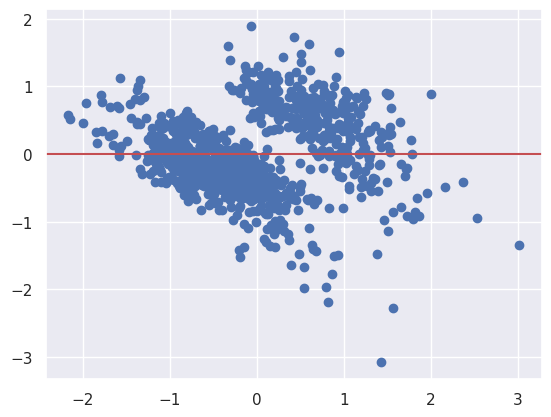

In [28]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

## Evaluación modelo 2

- Copio el df original

In [29]:
df_second = df_data.copy()

- Hago nuevo modelo usando solo las comumnas de interes

In [30]:
df_second.columns

Index(['Lowest distortion', 'A', 'B', 'Radius A [ang]', 'Radius B [ang]',
       'Formation energy [eV/atom]', 'Stability [eV/atom]',
       'Volume per atom [A^3/atom]', 'Band gap [eV]', 'a [ang]',
       'Vacancy energy [eV/O atom]', 'Stability (log[eV/atom])',
       'Vacancy energy (log[eV/O atom])', 'Magnetic moment (^2[mu_B])',
       'Valence B_1', 'Valence B_2', 'Valence B_3', 'Valence B_4',
       'Valence B_5', 'Valence B_element not in BV', 'Valence B_not balanced'],
      dtype='object')

In [31]:
X_cols = ['Radius A [ang]', 'Radius B [ang]', 'Formation energy [eV/atom]', 'Stability [eV/atom]',
        'Volume per atom [A^3/atom]','Band gap [eV]', 'Vacancy energy [eV/O atom]', 'Stability (log[eV/atom])',]
y_col = ['a [ang]']

x = df_second[X_cols]
y = df_second[y_col]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle = True)

x_st_scaler = StandardScaler() #Creo instancia del scaler
y_st_scaler = StandardScaler() #Creo instancia del scaler

X_train = x_st_scaler.fit_transform(X_train) # escalo train
X_test = x_st_scaler.transform(X_test) #transformo test
y_train = y_st_scaler.fit_transform(y_train.values.reshape(-1,1)) # escalo train
y_test = y_st_scaler.transform(y_test.values.reshape(-1,1)) #transformo test

model = LinearRegression(fit_intercept=False) #entreno SIN el intercepto
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

- Evaluacióon rápida

In [32]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.6344
mse:  0.3535


- Stats

In [33]:
#model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [34]:
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min      1Q  Median     3Q    Max
-1.8344 -0.4153   0.082 0.4027 3.0359


Coefficients:
                            Estimate  Std. Error  t value   p value
_intercept                  0.000000    0.018379   0.0000  1.000000
Radius A [ang]             -0.078149    0.022901  -3.4125  0.000668
Radius B [ang]              0.179212    0.029570   6.0605  0.000000
Formation energy [eV/atom] -0.105924    0.025048  -4.2288  0.000026
Stability [eV/atom]        -0.358345    0.033761 -10.6142  0.000000
Volume per atom [A^3/atom]  0.219693    0.028094   7.8199  0.000000
Band gap [eV]               0.070810    0.020589   3.4393  0.000606
Vacancy energy [eV/O atom] -0.161608    0.023866  -6.7714  0.000000
Stability (log[eV/atom])   -0.354154    0.028207 -12.5557  0.000000
---
R-squared:  0.63441,    Adjusted R-squared:  0.63161
F-statistic: 226.45 on 8 features


- Residuals

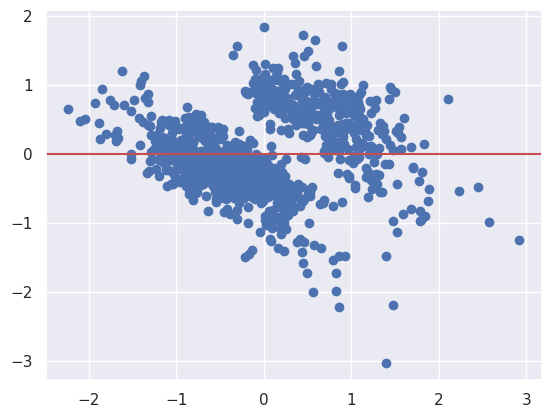

In [35]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a7ebb3ed-5c94-423a-a3b7-e9cd0209ff98' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>